# Úkol č. 1 - vizualizace dat a web scraping (do 20. října)

  * V rámci tohoto úkolu musíte stáhnout dat z webu (tzv. _web scraping_, velmi základní) a následně data zpracovat a vizualizovat.
  * Cílem bude stáhnout data ze serveru https://www.volby.cz týkající se voleb do zastupitelstva Vámi vybraného (většího) města, uložit data o závěrečných pracích v tabulkovém formátu a pak vymyslet vizualizace a zobrazení dat, které umožní orientaci v těchto datech a zvýrazní zajímavé informace a zobrazit přehledně časový vývoj různých veličin.
 
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Výběr zdroje dat

Vyberte si větší město, které má zastupitelstvo druhu 3 (Zastupitelstvo statutárního města) a strojově stáhněte informace o stranách a kandidátkách z následujících let:
 * [2002](https://www.volby.cz/pls/kv2002/kv12?xjazyk=CZ&xid=0), [2006](https://www.volby.cz/pls/kv2006/kv12?xjazyk=CZ&xid=0), [2010](https://www.volby.cz/pls/kv2010/kv12?xjazyk=CZ&xid=0), [2014](https://www.volby.cz/pls/kv2014/kv12?xjazyk=CZ&xid=0) a [2018](https://www.volby.cz/pls/kv2018/kv12?xjazyk=CZ&xid=0).
 

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **8 bodů**:
  * Strojově stáhněte data pro vybrané město a uložte je všechny do (asi dvou) přehledných tabulek ve formátu _csv_.
  * Data musí obsahovat _alespoň_ toto:
    * Vývoj výsledků (v procentech i počtu hlasů) pro jednotlivé strany v jednotlivých letech.
    * Seznam všech kandidátů všech stran v jednotlivých letech, u kandidáta by mělo být zaznamenáno: jméno, věk v době voleb, navrhující strana, politická příslušnost, volební zisk (procento i počet hlasů), pořadí na kandidátce, pořadí zvolení, jestli získal mandát (tyto informace získáte souhrnně ve _jmenných seznamech_).
  * V druhé části Vašeho Jupyter notebooku pracujte s těmito tabulkami načtenými z _csv_ souboru (aby opravující nemusel spouštět stahování z webu).
  * Tabulky ve formátu _csv_ také odevzdejte.
  * S využitím vybraných nástrojů zpracujte data a vymyslete vizualizace a grafy, aby bylo vidět následující:
    * Časový vývoj (po rocích voleb) počtu kandidujících stran i lidí a to celkově i po jednotlivých stranách (ve volbách, kterých se daná strana účastnila).
    * Věkovou strukturu kandidátů celkově i za jednotlivé strany a vývoj této struktury během jednotlivých voleb.
    * Časový vývoj volební účasti a volebních výsledků jednotlivých stran.
    * Časový vývoj podílu kandidujících s titulem a bez titulu.

**Další body zadání** za případné další body (můžete si vybrat, maximum bodů za úkol je každopádně 12 bodů):
  * (až +2 body) U titulů se pokuste rozlišit i různé stupně vzdělání: bakalářský, magisterský, doktorský a vyšší, vojenská hodnost atp. Zkuste odhadnout i podíl žen na kandidátkách.
  * (až +4 body) Pokuste se u jednotlivých kandidátů zjistit, zda kandidovali ve více volbách. Najděte 10 nejpilnějších kandidátů a vypište jejich volební zisky a za jaké strany kandidovali.
  * (až +2 body) Najděte nějaký balíček, který Vám dovolí do Vašeho notebooku zavést interaktivní prvky, např. si vyberete v select-boxu stranu a Váš notebook zobrazí grafy pouze pro ni atp.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte nejen Jupyter Notebook, ale i _csv_ soubor(y) se staženými daty.
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

In [3]:
import numpy as np
import pandas as pd
import sklearn as skit
import matplotlib.pyplot as plt
import seaborn as sns
import html5lib
import requests
import re
from bs4 import BeautifulSoup
years = [2002,2006,2010,2014,2018]

### Načtení dat z roku 2002
V následujícím bloku se načtou data pro město Karlovy vary z roku 2002 a osekají se o nepotřebné sloupce.

In [4]:
# Load data from webpage
url = 'https://www.volby.cz/pls/kv2002/kv1111?xjazyk=CZ&xid=0&xdz=3&xnumnuts=4102&xobec=554961' # výsledky voleb
dfs = pd.read_html(url,flavor='html5lib',)
political_parties02 = dfs[1]
# Drop first column names
political_parties02.columns = dfs[1] . columns . droplevel()
political_parties02 = political_parties02 . drop('Kandidátní listina', axis = 1) . drop('Podíly hlasů', axis = 1) . drop('Přepočtenýzákladdle počtukandidátů', axis = 1) . drop('Přepočtené % plat. hlasů', axis = 1)
# Change names of columns
political_parties02 = political_parties02 . rename({'Kandidátní listina.1' : 'Název',
                    'abs.' : 'Hlasy, abs.',
                    'v %'  : 'Hlasy, v %',
                    'Početkandidátů' : 'Počet kandidátů',
                    'Početmandátů' : 'Počet mandátů'}, axis = 1)
political_parties02.insert(3, 'Rok voleb', 2002) 
political_parties02

Název Hlasy, abs.  Hlasy, v %  Rok voleb  \
0                       Pravý Blok         958        0.19       2002   
1        Strana za životní jistoty         906        0.18       2002   
2                    Česká pravice      17 360        3.37       2002   
3   Dem.K.V.-S.ODA, N.P.a Zak.č.US      24 320        4.72       2002   
4   Komunistická str.Čech a Moravy      71 746       13.93       2002   
5                  Strana zelených      28 235        5.48       2002   
6     Občanská demokratická strana     121 926       23.68       2002   
7                        NEZÁVISLÍ       6 808        1.32       2002   
8             Sdružení nezávislých      45 982        8.93       2002   
9                Sdružení ČSNS, NK       3 724        0.72       2002   
10      Strana demokrat.socialismu       7 187        1.40       2002   
11    Česká str.sociálně demokrat.      85 336       16.57       2002   
12             Karlovarská koalice     100 492       19.51       2002   

    Počet kandidátů  Počet mandátů  
0                11              0  
1                 7              0  
2                38              0  
3                38              0  
4                38              6  
5                38              2  
6                38             10  
7                37              0  
8                38              4  
9                30              0  
10               36              0  
11               38              7  
12               37              9

### Načítání kandidátů z roku 2002
Zde se načtou všichni kandidáty pro všechny strany z roku 2002

In [5]:
#Get the whole table
url = 'https://www.volby.cz/pls/kv2002/kv21111?xjazyk=CZ&xid=1&xv=11&xdz=3&xnumnuts=4102&xobec=554961&xstrana=0'
candidates02 = pd.read_html(url, flavor = 'html5lib')[0]

#columns have two-leveled descriptions, drop one of them
candidates02.columns = candidates02 . columns . droplevel()
candidates02 = candidates02 . drop('Kandidátnílistina', axis = 1)

# Rename column which didnt have level-two description
candidates02 = candidates02 . rename({'Kandidátnílistina.1' : "Kandidátní listina", 
                                      'v %'  : 'Hlasy, v %',
                                      'abs.' : 'Hlasy, abs.',
                                      'Polit.přísl.' : 'Politická příslušnost',
                                      'Navrh.strana' : 'Navrhující strana'}, axis = 1)
#Add election year to each candidate
candidates02 . insert(4, "Rok voleb", 2002)
candidates02


Kandidátní listina  Poř.číslo     Příjmení, jméno Tituly  \
0                     Česká pravice          9         Adámek Petr    NaN   
1               Karlovarská koalice         19  Andrejkivová Pavla    NaN   
2               Karlovarská koalice         20       Antonik Jozef    NaN   
3    Komunistická str.Čech a Moravy         14   Aubrecht Miroslav    NaN   
4                   Strana zelených          9         Balák Libor    NaN   
..                              ...        ...                 ...    ...   
419    Česká str.sociálně demokrat.          2        Zeman Martin    NaN   
420                      Pravý Blok          5  Zimmermann Bedřich    NaN   
421                      Pravý Blok          6      Zimmermann Jan    NaN   
422                 Strana zelených         27       Zoubek Václav    NaN   
423                 Strana zelených          2        Žlebek Pavel  RNDr.   

     Rok voleb  Věk Navrhující strana Politická příslušnost Hlasy, abs.  \
0         2002   54                ČP                 BEZPP         419   
1         2002   56           KDU-ČSL               KDU-ČSL       3 158   
2         2002   58               VPM                 BEZPP       2 588   
3         2002   73              KSČM                  KSČM       1 858   
4         2002   41                SZ                 BEZPP       1 229   
..         ...  ...               ...                   ...         ...   
419       2002   45              ČSSD                  ČSSD       2 617   
420       2002   60                PB                 BEZPP          84   
421       2002   19                PB                 BEZPP          75   
422       2002   48                SZ                 BEZPP         631   
423       2002   58                SZ                    SZ       1 458   

     Hlasy, v %  Pořadí Mandát  
0          2.41     NaN    NaN  
1          3.14     4.0      *  
2          2.57    11.0    NaN  
3          2.58     8.0    NaN  
4          4.35     2.0    NaN  
..          ...     ...    ...  
419        3.06     3.0      *  
420        8.76     NaN    NaN  
421        7.82     NaN    NaN  
422        2.23    25.0    NaN  
423        5.16     2.0      *  

[424 rows x 12 columns]

## Načtení dat z ostatních let

In [6]:
url ="https://www.volby.cz/pls/kv{}/kv1111?xjazyk=CZ&xid=0&xdz=3&xnumnuts=4102&xobec=554961&xstat=0&xvyber=0"
parties = pd.DataFrame()
candidates = pd.DataFrame()

for year in [2006, 2010, 2014, 2018]:
    party = pd.read_html( url.format(year), flavor='html5lib', decimal = ',', thousands = '.')
    party[1].columns = party[1] . columns . droplevel()
    party[1] = party[1] . drop('číslo', axis = 1) . drop('Podílyhlasů', axis = 1) . drop('Přepočtenýzákladdle počtukandidátů', axis = 1) . drop('Přepočtené %platných hlasů', axis = 1)
    # Change names of columns
    party[1] = party[1] . rename({'název' : 'Název',
                    'abs.' : 'Hlasy, abs.',
                    'v %'  : 'Hlasy, v %',
                    'Početkandidátů' : 'Počet kandidátů',
                    'Početmandátů' : 'Počet mandátů'}, axis = 1)
    party[1].insert(0, "Rok voleb",year)
    parties = parties . append(party[1], ignore_index = True)
    
parties = political_parties02.append(parties, ignore_index = True)
parties['Hlasy, abs.'] = [float(str(val).replace('\xa0','')) for val in parties['Hlasy, abs.'].values]
parties.to_csv('parties.csv', index = False)
parties

/usr/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


Hlasy, abs.  Hlasy, v %                           Název  Počet kandidátů  \
0         958.0        0.19                      Pravý Blok               11   
1         906.0        0.18       Strana za životní jistoty                7   
2       17360.0        3.37                   Česká pravice               38   
3       24320.0        4.72  Dem.K.V.-S.ODA, N.P.a Zak.č.US               38   
4       71746.0       13.93  Komunistická str.Čech a Moravy               38   
..          ...         ...                             ...              ...   
63      14217.0        3.12       KOLONÁDA - HNUTÍ PATRIOTŮ               35   
64      51870.0       11.37   Karlovar.občanská alternativa               35   
65      16294.0        3.57                   STAN a TOP 09               35   
66      35401.0        7.76     ODS s podp. Str. s. ČR a MK               35   
67     108878.0       23.86                        ANO 2011               35   

    Počet mandátů  Rok voleb  
0               0       2002  
1               0       2002  
2               0       2002  
3               0       2002  
4               6       2002  
..            ...        ...  
63              0       2018  
64              5       2018  
65              0       2018  
66              3       2018  
67             12       2018  

[68 rows x 6 columns]

In [7]:
url = 'https://www.volby.cz/pls/kv{}/kv21111?xjazyk=CZ&xid=1&xv=11&xdz=3&xnumnuts=4102&xobec=554961&xstrana=0'
candidates = pd.DataFrame()
for year in [2006,2010,2014,2018]:
    table = pd.read_html(url.format(year), flavor = 'html5lib', decimal=',', thousands='.')[0]
    table . columns = table . columns . droplevel()
        # Delete title from name and surname and move it to its own column
    for index, string in table.iterrows() :
        words = string['příjmení, jméno, tituly'].split(' ');
        inl = 0
        for i, word in enumerate(words) :
            # Find words which end in dot, that means that we found first title
            # Also exclude the world ml., which means "mladsi"
            if word[-1] == '.' and word != "ml.":
                table.at[index, 'příjmení, jméno, tituly'] = ' '.join(words[:i])
                table.at[index, 'Tituly'] = ' '.join(words[i:])
                break
    table = table . drop('číslo', axis = 1)
    table = table . rename({'poř.číslo' : 'Por.číslo',
                'příjmkení, jméno, tituly' : 'Příjmení, jméno',
                'v %'  : 'Hlasy, v %',
                'abs.' : 'Hlasy, abs.',
                'Pořadízvolení/náhradníka' : 'Pořadí',
                'Navrhujícístrana' : 'Navrhující strana',
                'Politickápříslušnost' : 'Politická příslušnost',
                'název' : 'Kandidátní listina',
                'věk' : 'Věk',
                'Por.číslo' : 'Poř.číslo',}, axis = 1)    
    table.insert(1, "Rok voleb", year)
    candidates = candidates . append(table, ignore_index = True)
candidates = candidates02 . append(candidates, ignore_index = True)
candidates = candidates.replace( '', np.nan)
candidates = candidates.replace('-', np.nan)
candidates['Hlasy, abs.'] = [float(str(val).replace('\xa0','')) for val in candidates['Hlasy, abs.'].values]
candidates.to_csv('candidates.csv', index = False)
candidates

Hlasy, abs.  Hlasy, v %              Kandidátní listina Mandát  \
0           419.0        2.41                   Česká pravice    NaN   
1          3158.0        3.14             Karlovarská koalice      *   
2          2588.0        2.57             Karlovarská koalice    NaN   
3          1858.0        2.58  Komunistická str.Čech a Moravy    NaN   
4          1229.0        4.35                 Strana zelených    NaN   
...           ...         ...                             ...    ...   
2274       3294.0        3.02                        ANO 2011      *   
2275       3157.0        2.89                        ANO 2011    NaN   
2276       1608.0        3.10   Karlovar.občanská alternativa    NaN   
2277       1143.0        2.20   Karlovar.občanská alternativa    NaN   
2278        631.0        2.80  Svob.a př.dem.-T.Okamura (SPD)    NaN   

     Navrhující strana Politická příslušnost  Por.číslo  Poř.číslo Pořadí  \
0                   ČP                 BEZPP        NaN        9.0    NaN   
1              KDU-ČSL               KDU-ČSL        NaN       19.0      4   
2                  VPM                 BEZPP        NaN       20.0     11   
3                 KSČM                  KSČM        NaN       14.0      8   
4                   SZ                 BEZPP        NaN        9.0      2   
...                ...                   ...        ...        ...    ...   
2274               ANO                   ANO        3.0        NaN      3   
2275               ANO                   ANO       13.0        NaN      1   
2276               KOA                   KOA       15.0        NaN     10   
2277               KOA                 BEZPP       35.0        NaN     30   
2278               SPD                 BEZPP       29.0        NaN    NaN   

         Příjmení, jméno  Rok voleb    Tituly  Věk  
0            Adámek Petr       2002       NaN   54  
1     Andrejkivová Pavla       2002       NaN   56  
2          Antonik Jozef       2002       NaN   58  
3      Aubrecht Miroslav       2002       NaN   73  
4            Balák Libor       2002       NaN   41  
...                  ...        ...       ...  ...  
2274         Žáková Hana       2018  Mgr. Bc.   54  
2275      Žemlička Milan       2018       NaN   39  
2276      Žemlička Pavel       2018      Ing.   54  
2277     Ženíšková Alena       2018       NaN   55  
2278        Žižka Ondřej       2018       NaN   27  

[2279 rows x 13 columns]

### Pracovani s daty
Nacteni tabulek

In [8]:
df_parties = pd.read_csv('parties.csv')
df_candidates = pd.read_csv('candidates.csv')

In [9]:
df_parties

Hlasy, abs.  Hlasy, v %                           Název  Počet kandidátů  \
0         958.0        0.19                      Pravý Blok               11   
1         906.0        0.18       Strana za životní jistoty                7   
2       17360.0        3.37                   Česká pravice               38   
3       24320.0        4.72  Dem.K.V.-S.ODA, N.P.a Zak.č.US               38   
4       71746.0       13.93  Komunistická str.Čech a Moravy               38   
..          ...         ...                             ...              ...   
63      14217.0        3.12       KOLONÁDA - HNUTÍ PATRIOTŮ               35   
64      51870.0       11.37   Karlovar.občanská alternativa               35   
65      16294.0        3.57                   STAN a TOP 09               35   
66      35401.0        7.76     ODS s podp. Str. s. ČR a MK               35   
67     108878.0       23.86                        ANO 2011               35   

    Počet mandátů  Rok voleb  
0               0       2002  
1               0       2002  
2               0       2002  
3               0       2002  
4               6       2002  
..            ...        ...  
63              0       2018  
64              5       2018  
65              0       2018  
66              3       2018  
67             12       2018  

[68 rows x 6 columns]

In [10]:
df_candidates

Hlasy, abs.  Hlasy, v %              Kandidátní listina Mandát  \
0           419.0        2.41                   Česká pravice    NaN   
1          3158.0        3.14             Karlovarská koalice      *   
2          2588.0        2.57             Karlovarská koalice    NaN   
3          1858.0        2.58  Komunistická str.Čech a Moravy    NaN   
4          1229.0        4.35                 Strana zelených    NaN   
...           ...         ...                             ...    ...   
2274       3294.0        3.02                        ANO 2011      *   
2275       3157.0        2.89                        ANO 2011    NaN   
2276       1608.0        3.10   Karlovar.občanská alternativa    NaN   
2277       1143.0        2.20   Karlovar.občanská alternativa    NaN   
2278        631.0        2.80  Svob.a př.dem.-T.Okamura (SPD)    NaN   

     Navrhující strana Politická příslušnost  Por.číslo  Poř.číslo  Pořadí  \
0                   ČP                 BEZPP        NaN        9.0     NaN   
1              KDU-ČSL               KDU-ČSL        NaN       19.0     4.0   
2                  VPM                 BEZPP        NaN       20.0    11.0   
3                 KSČM                  KSČM        NaN       14.0     8.0   
4                   SZ                 BEZPP        NaN        9.0     2.0   
...                ...                   ...        ...        ...     ...   
2274               ANO                   ANO        3.0        NaN     3.0   
2275               ANO                   ANO       13.0        NaN     1.0   
2276               KOA                   KOA       15.0        NaN    10.0   
2277               KOA                 BEZPP       35.0        NaN    30.0   
2278               SPD                 BEZPP       29.0        NaN     NaN   

         Příjmení, jméno  Rok voleb    Tituly  Věk  
0            Adámek Petr       2002       NaN   54  
1     Andrejkivová Pavla       2002       NaN   56  
2          Antonik Jozef       2002       NaN   58  
3      Aubrecht Miroslav       2002       NaN   73  
4            Balák Libor       2002       NaN   41  
...                  ...        ...       ...  ...  
2274         Žáková Hana       2018  Mgr. Bc.   54  
2275      Žemlička Milan       2018       NaN   39  
2276      Žemlička Pavel       2018      Ing.   54  
2277     Ženíšková Alena       2018       NaN   55  
2278        Žižka Ondřej       2018       NaN   27  

[2279 rows x 13 columns]

## Počet kandidujících stran a kandidatu celkove

Text(0, 0.5, 'Pocet kandidatu')

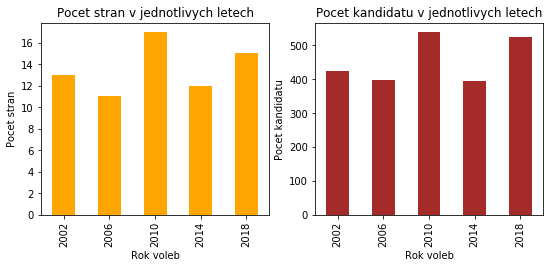

In [11]:
plt.figure(figsize=(9,12))
plt.subplot(321) 
ax = df_parties['Rok voleb'] . value_counts( sort = False) . plot( kind='bar', use_index = True, color = 'orange', title = 'Pocet stran v jednotlivych letech')
ax . set_xlabel("Rok voleb")
ax . set_ylabel("Pocet stran")
plt.subplot(322) 
ax = df_candidates['Rok voleb'] . value_counts( sort = False ) . plot(kind = 'bar', use_index = True, color = 'brown', title = 'Pocet kandidatu v jednotlivych letech')
ax . set_xlabel("Rok voleb")
ax . set_ylabel("Pocet kandidatu")


## Pocet kandidujicich po jednotlivych stranach v jednotlivych letech

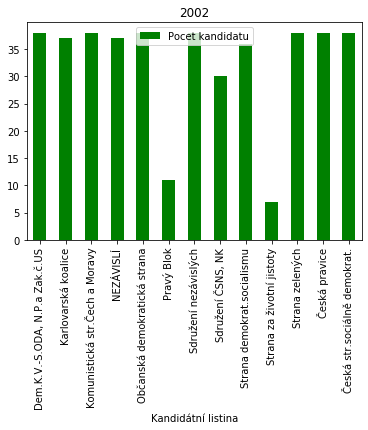

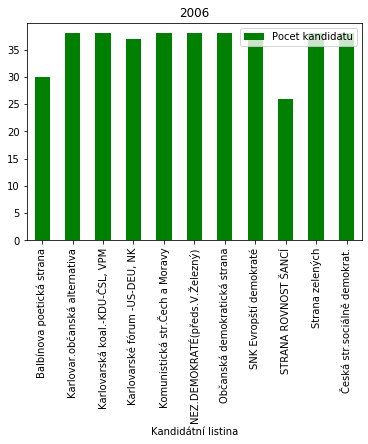

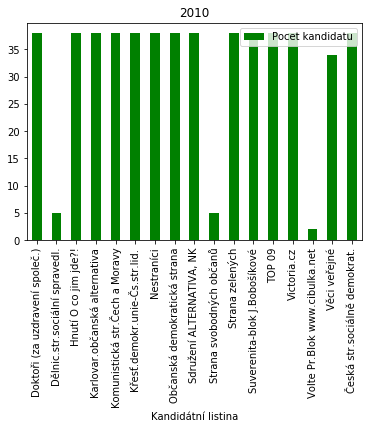

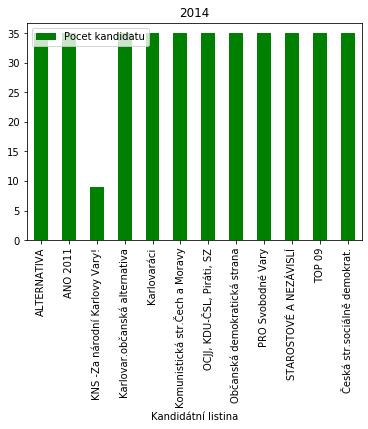

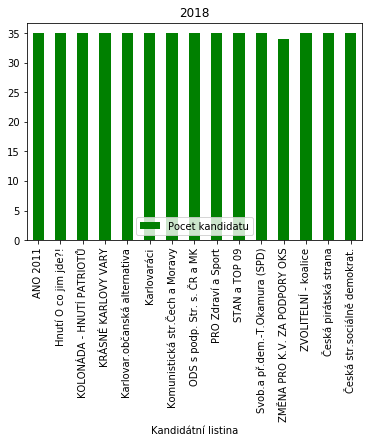

In [12]:
for year in years:
    df = pd.DataFrame(df_candidates[df_candidates['Rok voleb'] == year].groupby('Kandidátní listina').agg(len), columns = ['Hlasy, abs.'])
    df = df . rename({'Hlasy, abs.' : 'Pocet kandidatu'}, axis = 1)
    df . plot.bar( title = year, color = 'green')

### Uspesnost jednotlivych stran v jednotlivych letech
Prvni graf ukazuje, jestli byly v jednotlivych volbach nejake extremy

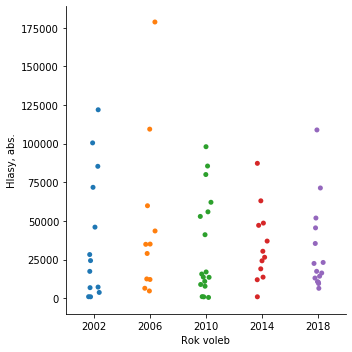

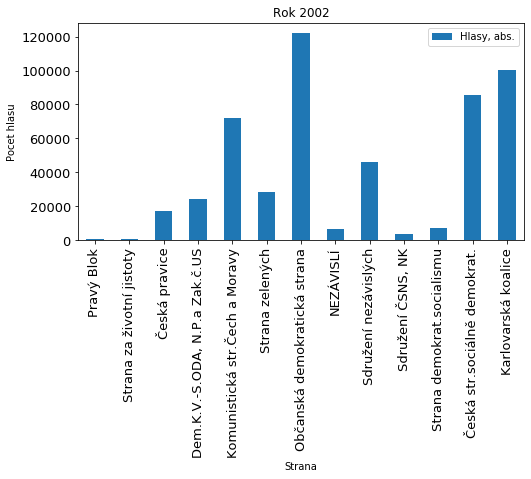

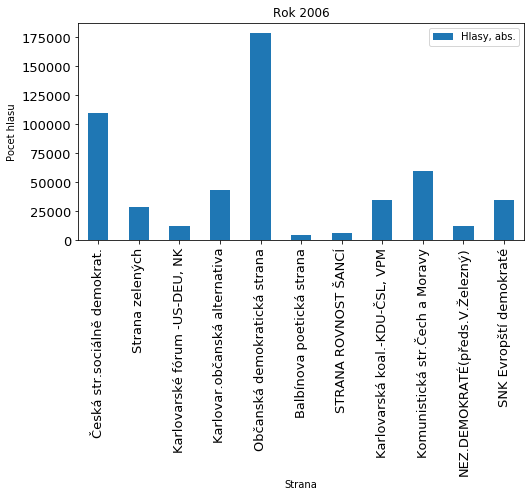

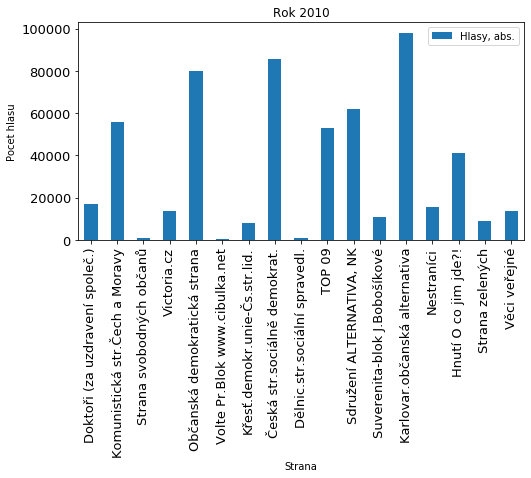

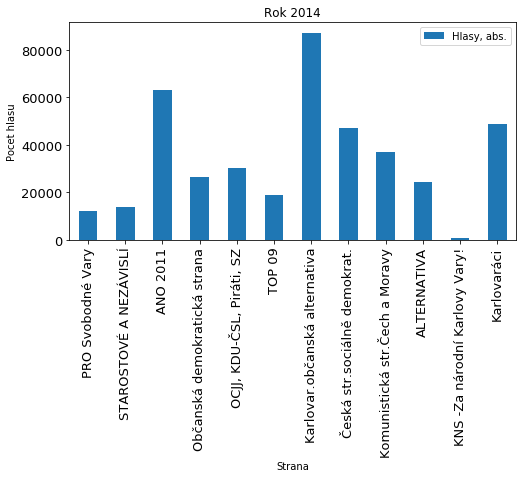

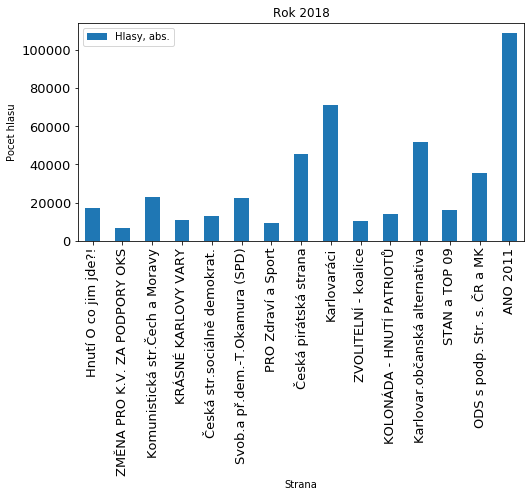

In [13]:
sns.catplot(x = 'Rok voleb', y = 'Hlasy, abs.', data = df_parties)
for year in years:
#     parties from given year
    data = df_parties[df_parties['Rok voleb'] == year];
    ax = data.plot(x = 'Název', y = ['Hlasy, abs.'],kind = 'bar',figsize=(8,4), fontsize='13', title = "Rok " + str(year))
    ax . set_xlabel('Strana')
    ax . set_ylabel('Pocet hlasu')

### Top 10 kandidatu, jenz kandidovali nejcasteji a pocet hlasu, ktere ziskali

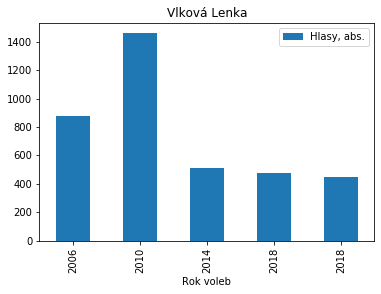

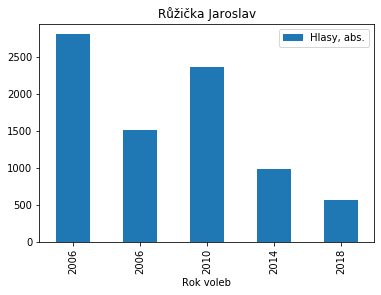

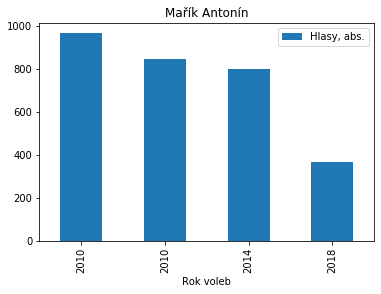

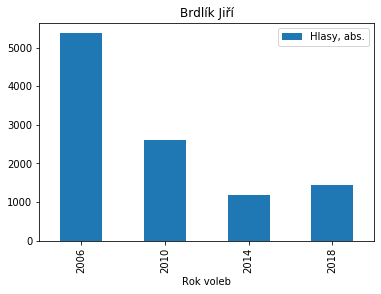

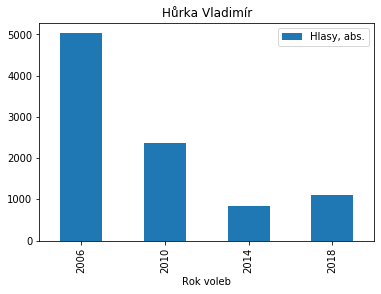

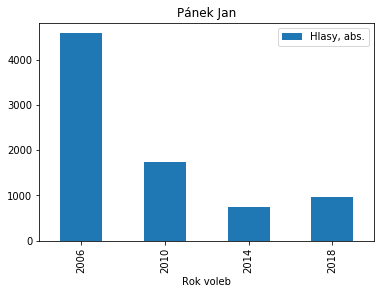

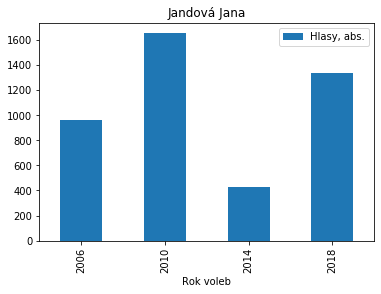

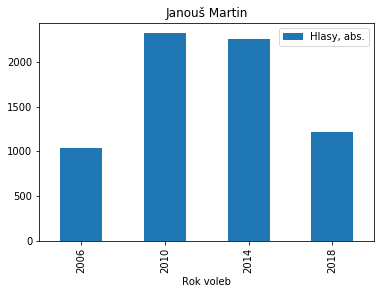

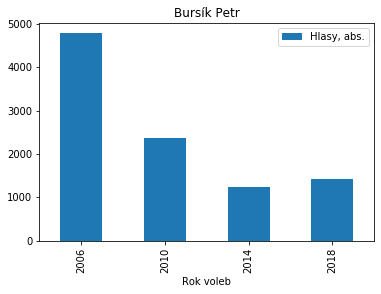

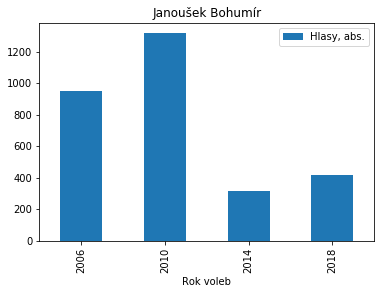

In [14]:
#parties from given year
top_ten = (df_candidates.groupby(['Příjmení, jméno']).size().sort_values(ascending=False)).head(10)
for x in top_ten.index :
    df_candidates[df_candidates['Příjmení, jméno'] == x].plot(x = 'Rok voleb',y = 'Hlasy, abs.', kind = 'bar', title = x )

### Tituly

In [15]:
def get_titles ( df ):
    titles_categ = {'Bakalářský' : 0, "Magisterský" : 0, "Doktorský" : 0, "Profesor / docent" : 0, "Kandidát věd" : 0,"Malý doktorát" : 0, "Jiný" : 0, "Žádný" : 0}
    for i, cand in df_candidates[(df_candidates['Rok voleb'] == year) & (df_candidates['Tituly'].notna())].iterrows():
        if "doc" in cand['Tituly'].lower() or "prof" in cand['Tituly'].lower():
            titles_categ['Profesor / docent'] += 1
        elif "csc" in cand['Tituly'].lower():
            titles_categ['Kandidát věd'] += 1
        elif "mgr" in cand['Tituly'].lower() or "ing" in cand['Tituly'].lower():
            titles_categ['Magisterský'] += 1
        elif "bc" in cand['Tituly'].lower():
            titles_categ['Bakalářský'] += 1
        elif "rndr" in cand['Tituly'].lower() or "mudr" in cand['Tituly'].lower() \
                    or "mddr" in cand['Tituly'].lower() or "judr" in cand['Tituly'].lower() or "phdr" in cand['Tituly'].lower():
            titles_categ["Malý doktorát"] += 1
        elif "phd" in cand['Tituly'].lower():
            titles_categ['Doktorský'] += 1
        else:
            titles_categ["Jiný"] += 1
    return titles_categ;

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f845e2ce910>],
      dtype=object)

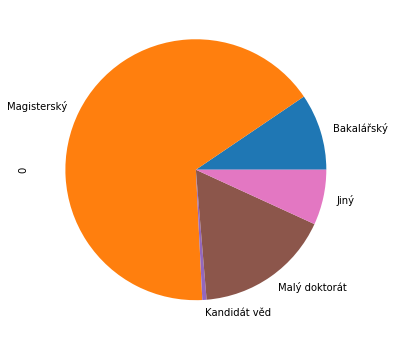

In [16]:
pd.DataFrame.from_dict(get_titles(df_candidates), orient = 'index') . plot(figsize=(6, 6), kind = 'pie', subplots = True, legend = False)

## Rozdeleni titulu v jednotlivych letech

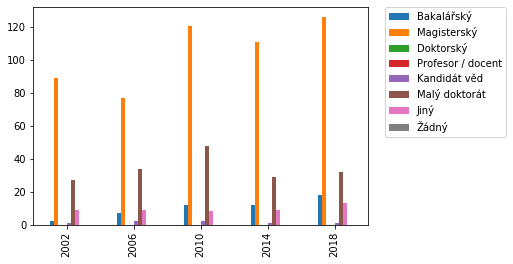

In [17]:
df_all = pd.DataFrame()
for year in [2002,2006,2010,2014,2018]:   
    cand_in_year = df_candidates[ df_candidates['Rok voleb'] == year ]
    df = pd.DataFrame( get_titles(cand_in_year), index = [year])
    df_all = df_all . append( df )
    
df_all.plot.bar()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

## Pocet lidi bez a s titulem v jednotlivych letech

Text(0.5, 0, 'Rok')

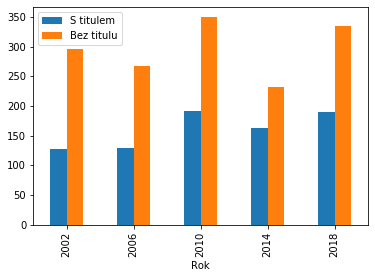

In [18]:
dict = {}
for year in years:
    dict[year] = [df_candidates[df_candidates['Rok voleb'] == year]['Tituly'].count(), len(df_candidates[df_candidates['Rok voleb'] == year]) - df_candidates[df_candidates['Rok voleb'] == year]['Tituly'].count()]

df = pd.DataFrame().from_dict(dict, orient='index', columns = ['S titulem', 'Bez titulu'])
ax = df.plot(kind = 'bar')
ax . set_xlabel('Rok')  


## Pocet hlasu stran v jednotlivych letech, pokud se voleb zucastnily vice nez jednou
U hlasu v procentech je maximalni hodnota 40, aby byl lepe videt rozdil mezi jednotlivymi stranami

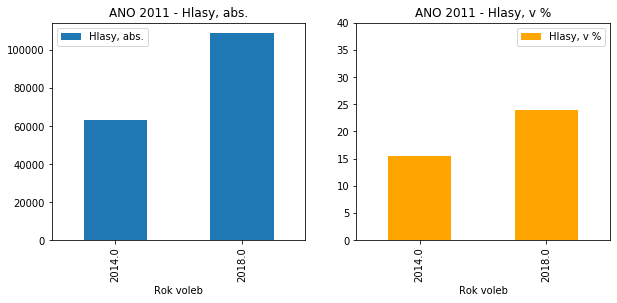

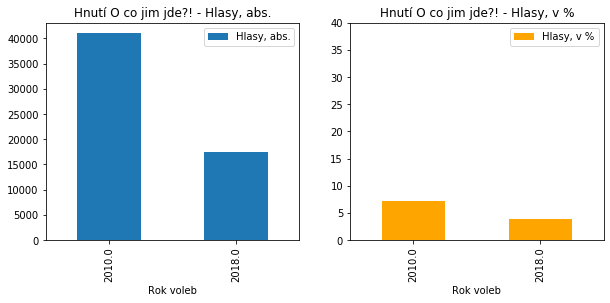

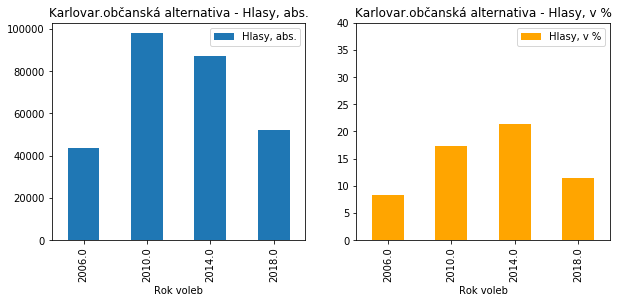

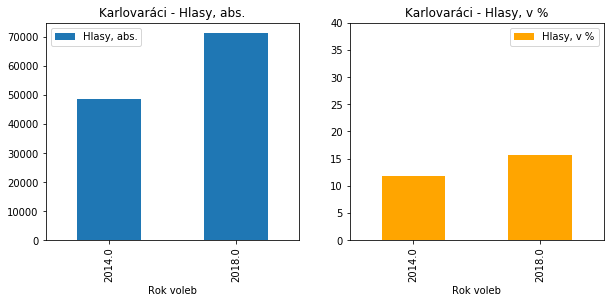

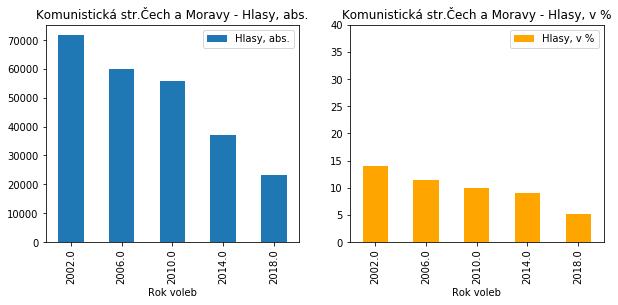

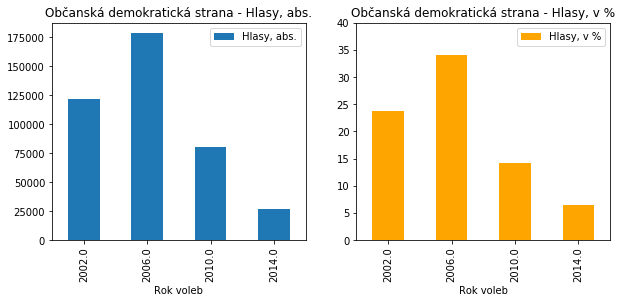

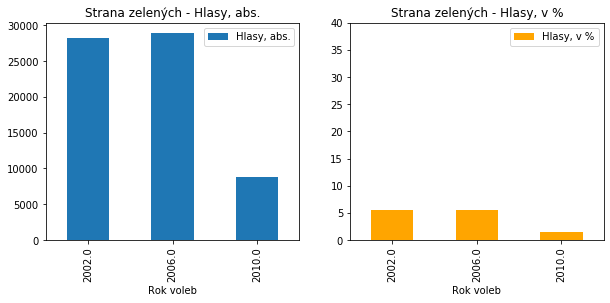

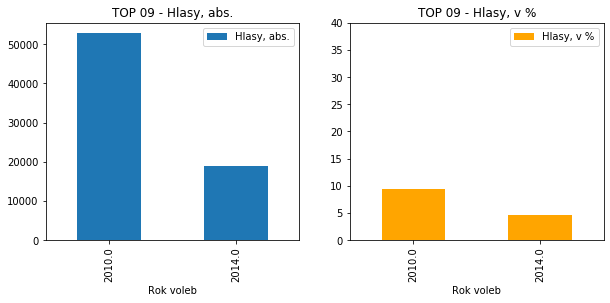

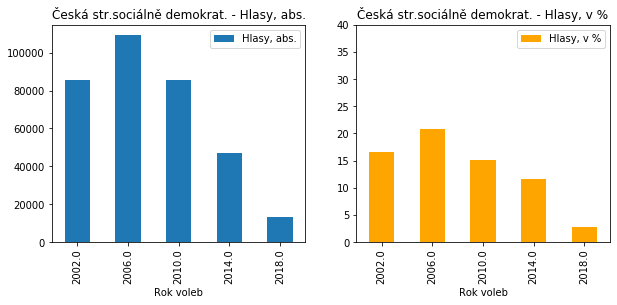

In [19]:
dupl = df_parties.duplicated(subset = 'Název', keep = False)
df_parties_dupl = pd.DataFrame()
for i, x in df_parties.iterrows():
    if dupl[i]:
        df_parties_dupl = df_parties_dupl . append(x, ignore_index = True)
x = df_parties_dupl . groupby('Název')



for label, party in x:
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))        
    party.plot(kind = 'bar', x = 'Rok voleb', y = 'Hlasy, abs.', title = label + " - Hlasy, abs.", ax = ax1)
    ax = party.plot(kind = 'bar', x = 'Rok voleb', y = 'Hlasy, v %', title = label + " - Hlasy, v %", color='orange', ax = ax2)
    ax . set_ylim(0, 40)

## Odhad pomeru zen a muzu

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f845e0e9d10>],
      dtype=object)

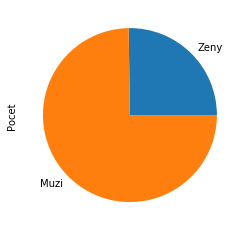

In [20]:
w = 0
m = 0
for i, x in df_candidates.iterrows():
    surname = x['Příjmení, jméno'].split(' ')[0]
    if surname.endswith("ová") or surname.endswith('á'):
        w += 1
    else:
        m += 1
df = pd.DataFrame().from_dict({'Zeny' : w, 'Muzi' : m}, orient='index', columns = ['Pocet'])
df.plot(kind = 'pie', subplots = True, legend = False)

## Vekove kategorie kandidatu celkove

In [21]:
def get_age (df):
    age_categ_list = {'18-23' : 0,'24-30' : 0,'31-40' : 0,'41-50' : 0,'51-60' : 0,'61-70' : 0,'71+' : 0}
    for i,x in df.iterrows():
        if(x['Věk'] < 24):
            age_categ_list['18-23'] += 1
        elif(x['Věk'] < 31):
            age_categ_list['24-30'] += 1
        elif(x['Věk'] < 41):
            age_categ_list['31-40'] += 1
        elif(x['Věk'] < 51):
            age_categ_list['41-50'] += 1
        elif(x['Věk'] < 61):
            age_categ_list['51-60'] += 1
        elif(x['Věk'] < 71):
            age_categ_list['61-70'] += 1
        else:
            age_categ_list['71+'] += 1
    return age_categ_list

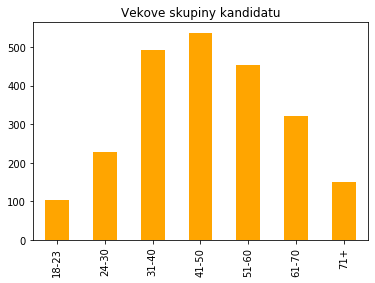

In [22]:
age_categ_df = pd.DataFrame.from_dict(get_age(df_candidates), orient = 'index')        
age_categ_df . plot(kind = 'bar', legend = False, title = 'Vekove skupiny kandidatu', color = 'orange')

## Vekove kategorie kandidatu v jednotlivych letech

<Figure size 1152x432 with 0 Axes>

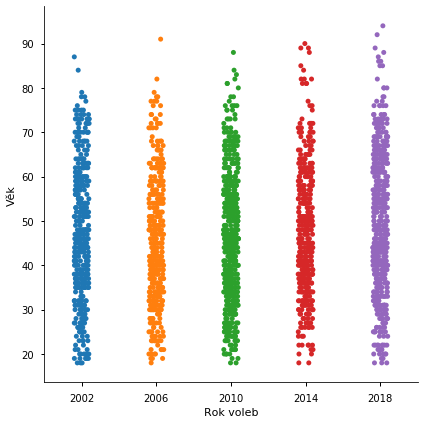

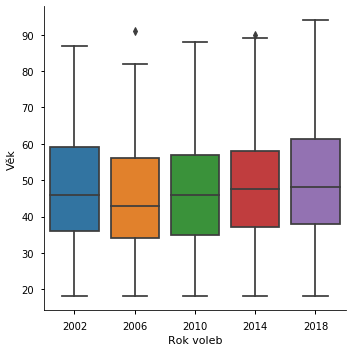

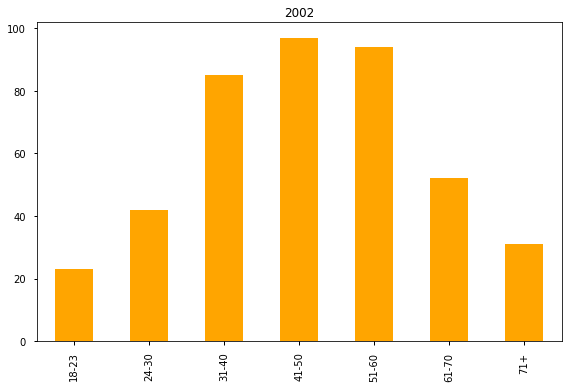

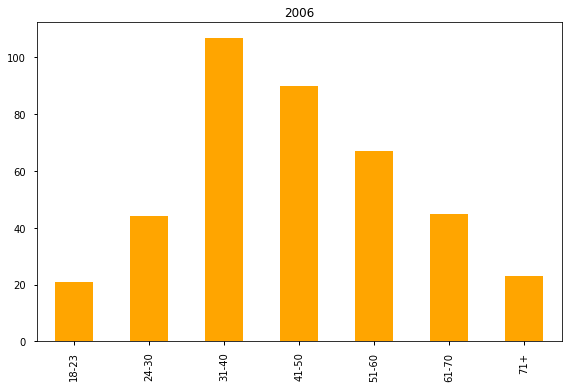

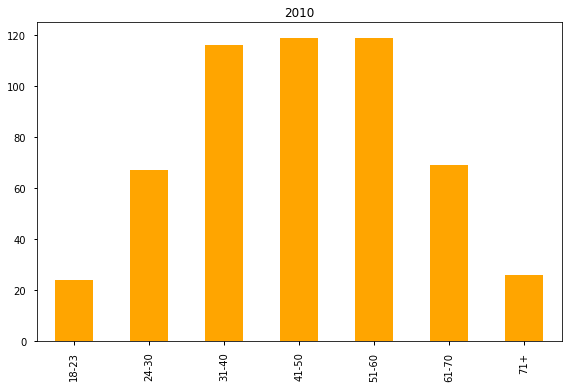

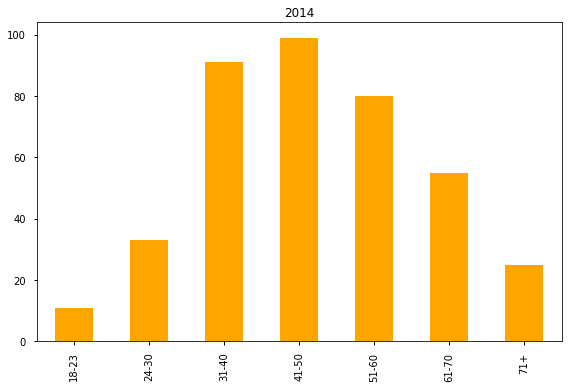

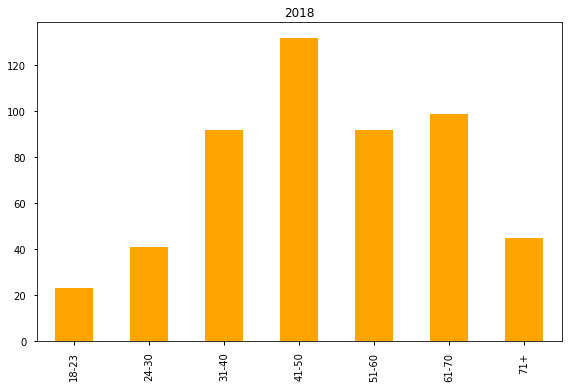

In [23]:
plt.style.use('seaborn-notebook')
plt.figure(figsize=(16, 6))
sns.catplot(data = df_candidates, x = 'Rok voleb', y = 'Věk', height = 6)
sns.catplot(x="Rok voleb", y="Věk", kind="box", data=df_candidates);

plt.show()
for year in years:
    pd.DataFrame.from_dict( get_age(df_candidates[df_candidates['Rok voleb'] == year]), orient = 'index') . plot(legend = False,kind = 'bar', title=year, color = 'orange')
    plt.tight_layout()

## Vekove kategorie kandidatu v jednotlivych stranach v jednotlivych letech

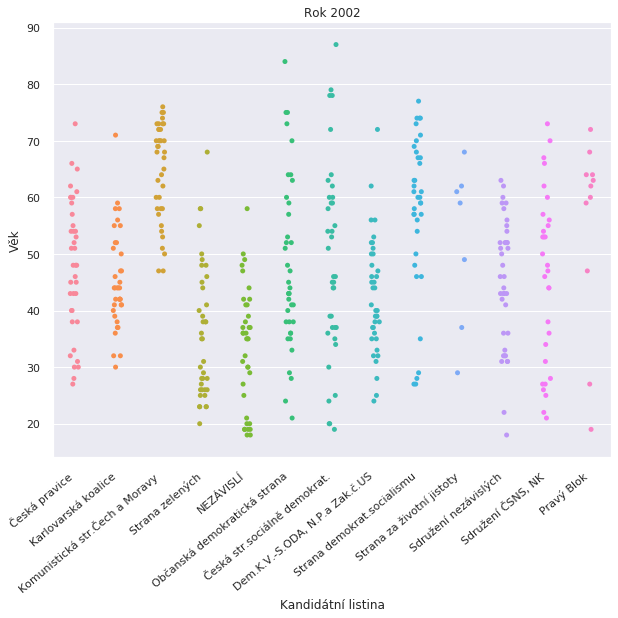

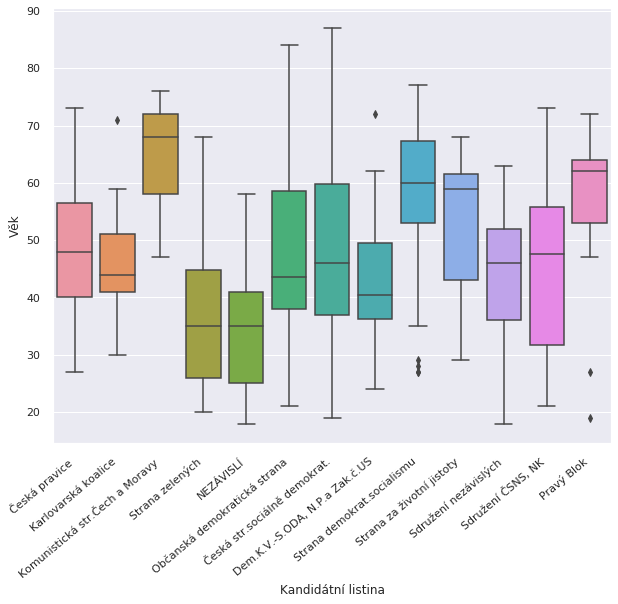

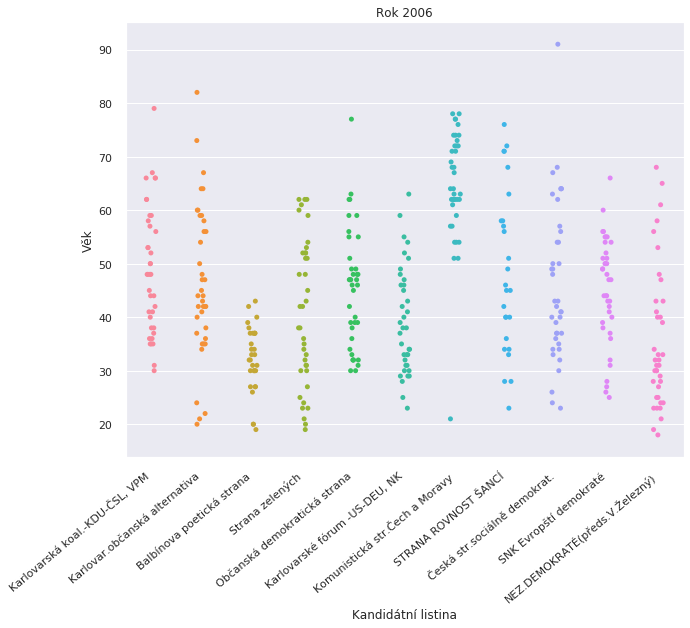

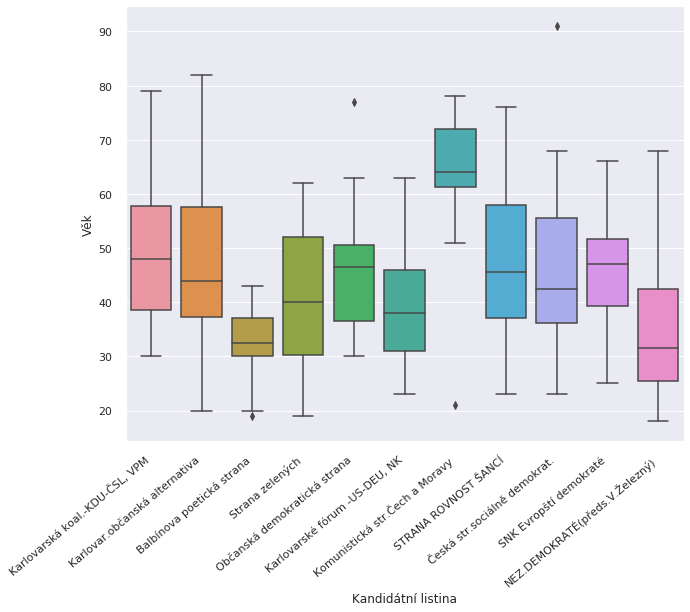

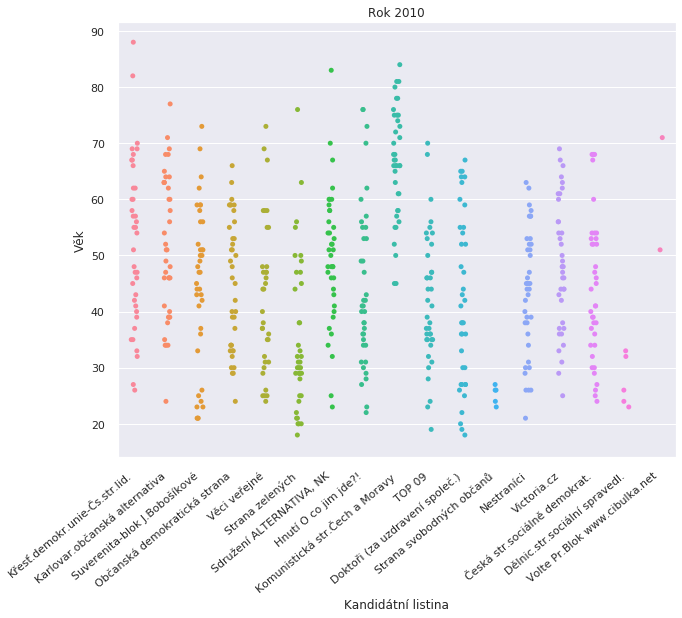

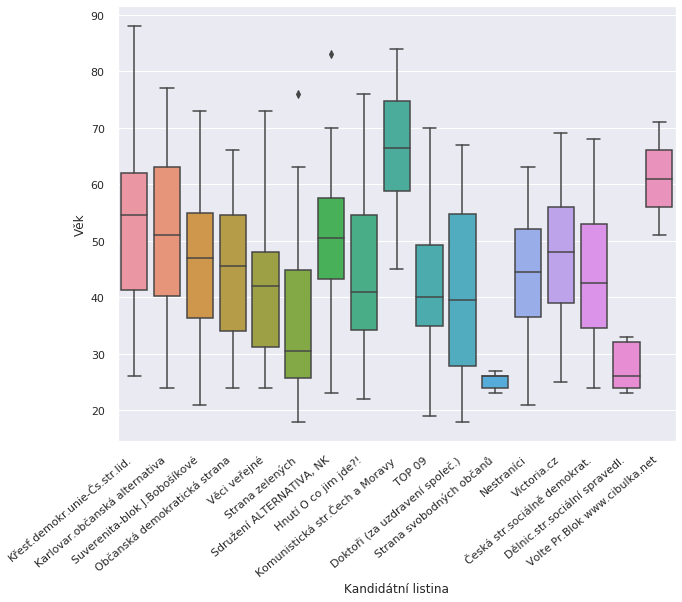

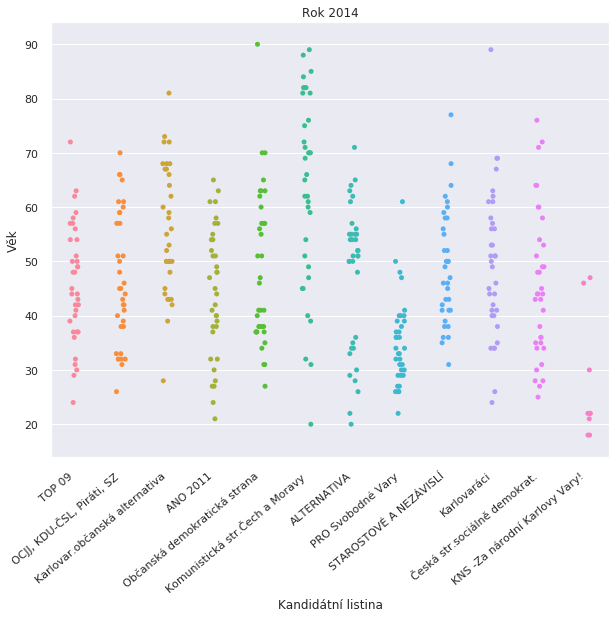

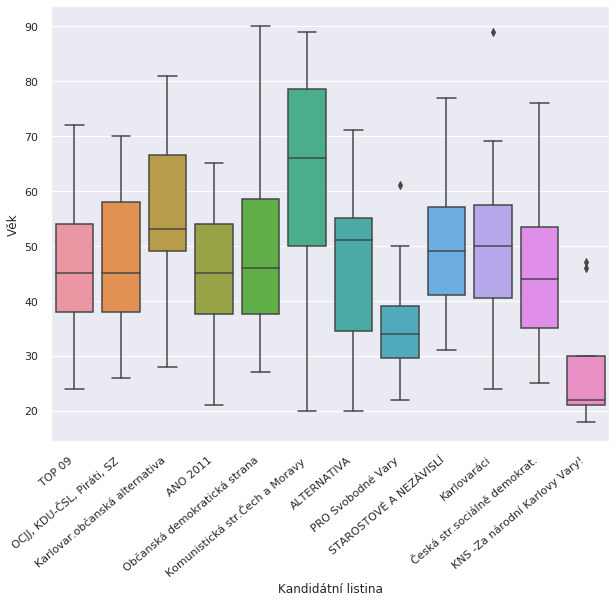

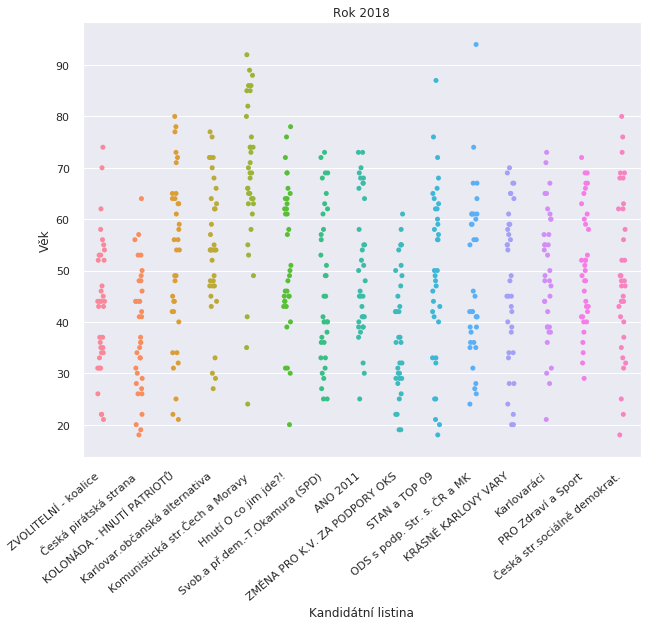

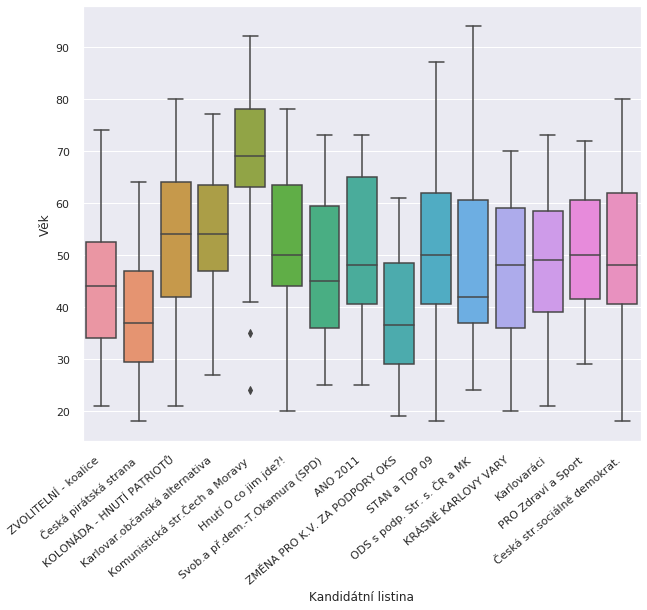

In [24]:
sns.set(style="darkgrid")
for year in years:
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 8)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, horizontalalignment='right')
    sns.stripplot(data = df_candidates[df_candidates['Rok voleb'] == year], x = 'Kandidátní listina', y = 'Věk').set_title("Rok " + str(year))
    
    fig_, bx = plt.subplots()
    fig_.set_size_inches(10, 8)
    bx.set_xticklabels(bx.get_xticklabels(), rotation=40, horizontalalignment='right')
    sns.catplot( ax=bx, kind="box", data = df_candidates[df_candidates['Rok voleb'] == year], x = 'Kandidátní listina', y = 'Věk');
    
    plt.close(3)
    plt.show()
    print('\n\n')
plt.style.use('ggplot') 